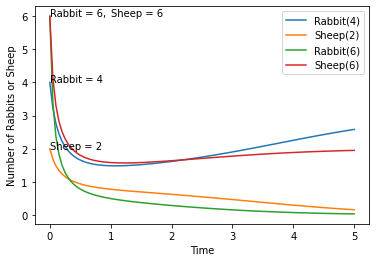

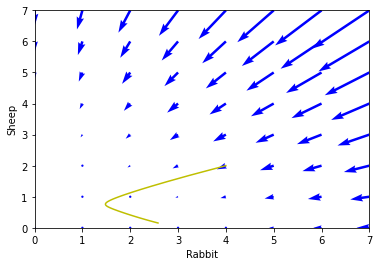

In [ ]:
# Stephen Cheney
# HW 6
#generate figure 4.4.1 of Shonkwiler and Herod - Lotka-Volterra
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from numpy import linspace, array, meshgrid, zeros

def phaseportrait(myf, y0lim, y1lim, a , b, c, d, e, f):

    y0 = linspace(y0lim[0], y0lim[1], int(y0lim[2]))
    y1 = linspace(y1lim[0], y1lim[1], int(y1lim[2]))
    Y0, Y1 = meshgrid(y0, y1)
    #print(Y0)
    #print(Y1)

    t = 0
    u, v = zeros(Y0.shape), zeros(Y1.shape)
    NI, NJ = Y0.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y0[i, j]
            y = Y1[i, j]
            yprime = myf([x, y], t, a, b, c, d, e, f)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]

    Q = plt.quiver(Y0, Y1, u, v, color='b') #THIS LINE MAKES THE ARROWS

#    plt.xlabel('$y_0$')
#    plt.ylabel('$y_1$')
    plt.xlim(y0lim[0], y0lim[1])
    plt.ylim(y1lim[0], y1lim[1])

# Declare the model
########### Question 1 ###########
# a: The standard rate of growth for rabbit population
# b: The multiplicative variable for death rate of rabbits
# c: The multiplicative varirable for death rate of rabbits based on sheep population
# d: The standard rate of growth for sheep population
# e: The multiplicative variable for death rate of sheep
# f: The multiplicative varirable for death rate of sheep based on rabbit population

def myModel(y, t, a, b, c, d, e, f):
    # y0 = rabbit population
    # y1 = sheep population
    dy0_dt = y[0]*(a-b*y[0]-c*y[1])
    dy1_dt = y[1]*(d-e*y[0]-f*y[1])
    return [dy0_dt,dy1_dt]

# these are the values in the original model
a=3.0; b=1.0; c=2.0; d=2.0; e=1.0; f=1.0
params = (a, b, c, d, e, f)

# specify the time points at which we want to evaluate the system
time = linspace(0.0, 5.0, 101)
# specify the initial values of the two variables
yinit = array([4, 2]) #y0 = 4, y1 =2
yinit2 = array([6,6]) #y0 = 6, y1 =6
# do the integration
y = odeint (myModel, yinit, time, params)
y2 = odeint (myModel, yinit2, time, params)

# plot the results
plt.plot(time, y[:,0], label='Rabbit(4)') # y[:,0] is the first column of y
plt.plot(time, y[:,1], label='Sheep(2)')
plt.plot(time, y2[:,0], label='Rabbit(6)') # y[:,0] is the first column of y
plt.plot(time, y2[:,1], label='Sheep(6)')
plt.xlabel('Time')
plt.ylabel('Number of Rabbits or Sheep')
plt.legend()
# Annotate starting values
# 4,2
s0 = 'Rabbit = ' + str(yinit[0])
s1 = 'Sheep = ' + str(yinit[1])
plt.annotate(s0, xy=[0,yinit[0]])
plt.annotate(s1, xy=[0,yinit[1]])

s2 = 'Rabbit = ' + str(yinit2[0]) +','
s3 = 'Sheep = ' + str(yinit2[1])
plt.annotate(s2, xy=[0,yinit2[0]])
plt.annotate(s3, xy=[1,yinit2[1]]) #label to avoid overlap


#plt.savefig('lec23fig1.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False) #allows the program to continue after showing figure

# make a new figure
plt.figure()
# create a phase plane plot: Sheep vs. Rabbit
plt.plot(y[:,0], y[:,1], 'y-') #(first column y, second colum y, color)
plt.xlabel('Rabbit')
plt.ylabel('Sheep')
# specify the points at which to show the derivative vector
y0lim = array([0, 7, 8]) # 8 since we want every integer from 0 to 7 to display
y1lim = array([0, 7, 8])
phaseportrait(myModel, y0lim, y1lim, a, b, c, d, e, f) # needs indidual values
#plt.savefig('lec23fig2.png', bbox_inches='tight') #save the plot to a file
plt.show()

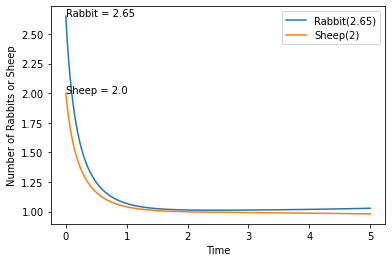

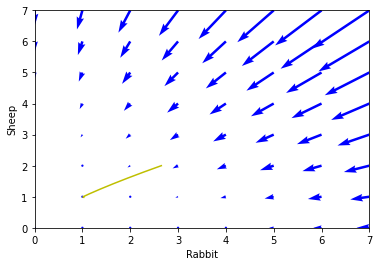

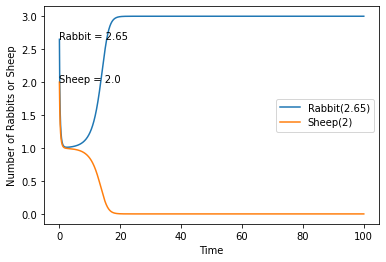

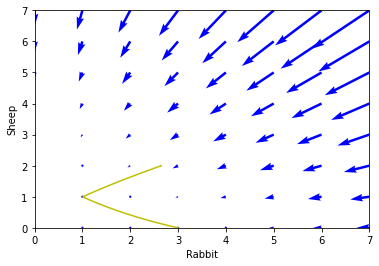

In [ ]:
# these are the values in the original model
a=3.0; b=1.0; c=2.0; d=2.0; e=1.0; f=1.0
params = (a, b, c, d, e, f)

# specify the time points at which we want to evaluate the system
time = linspace(0.0, 5.0, 10001)
# specify the initial values of the two variables
yinit = array([2.65, 2]) #y0 = 2.65, y1 =2
# do the integration
y = odeint (myModel, yinit, time, params)


# plot the results
plt.plot(time, y[:,0], label='Rabbit(2.65)') # y[:,0] is the first column of y
plt.plot(time, y[:,1], label='Sheep(2)')
plt.xlabel('Time')
plt.ylabel('Number of Rabbits or Sheep')
plt.legend()
# Annotate starting values
# 4,2
s0 = 'Rabbit = ' + str(yinit[0])
s1 = 'Sheep = ' + str(yinit[1])
plt.annotate(s0, xy=[0,yinit[0]])
plt.annotate(s1, xy=[0,yinit[1]])


#plt.savefig('lec23fig1.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False) #allows the program to continue after showing figure

# make a new figure
plt.figure()
# create a phase plane plot: Sheep vs. Rabbit
plt.plot(y[:,0], y[:,1], 'y-') #(first column y, second colum y, color)
plt.xlabel('Rabbit')
plt.ylabel('Sheep')
# specify the points at which to show the derivative vector
y0lim = array([0, 7, 8]) # 8 since we want every integer from 0 to 7 to display
y1lim = array([0, 7, 8])
phaseportrait(myModel, y0lim, y1lim, a, b, c, d, e, f) # needs indidual values
#plt.savefig('lec23fig2.png', bbox_inches='tight') #save the plot to a file
plt.show()

# specify the time points at which we want to evaluate the system
time = linspace(0.0, 100.0, 10001)
# specify the initial values of the two variables
yinit = array([2.65, 2]) #y0 = 2.65, y1 =2
# do the integration
y = odeint (myModel, yinit, time, params)


# plot the results
plt.plot(time, y[:,0], label='Rabbit(2.65)') # y[:,0] is the first column of y
plt.plot(time, y[:,1], label='Sheep(2)')
plt.xlabel('Time')
plt.ylabel('Number of Rabbits or Sheep')
plt.legend()
# Annotate starting values
# 4,2
s0 = 'Rabbit = ' + str(yinit[0])
s1 = 'Sheep = ' + str(yinit[1])
plt.annotate(s0, xy=[0,yinit[0]])
plt.annotate(s1, xy=[0,yinit[1]])


#plt.savefig('lec23fig1.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False) #allows the program to continue after showing figure

# make a new figure
plt.figure()
# create a phase plane plot: Sheep vs. Rabbit
plt.plot(y[:,0], y[:,1], 'y-') #(first column y, second colum y, color)
plt.xlabel('Rabbit')
plt.ylabel('Sheep')
# specify the points at which to show the derivative vector
y0lim = array([0, 7, 8]) # 8 since we want every integer from 0 to 7 to display
y1lim = array([0, 7, 8])
phaseportrait(myModel, y0lim, y1lim, a, b, c, d, e, f) # needs indidual values
#plt.savefig('lec23fig2.png', bbox_inches='tight') #save the plot to a file
plt.show()

########### Question 3 ###########
# The steady state appears to be 1 and 1 at time = 5. But as you increase the time,
# you can obviously see that the Rabbit overwhelms the sheep's growth rate and wins the competition.
# The final steady rate is at 3 Rabbits to no sheep, due to the competitive variables where the rabbit's
# growth rate and the sheep's death rate due to rabbits is linear.

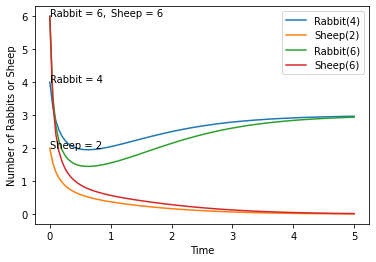

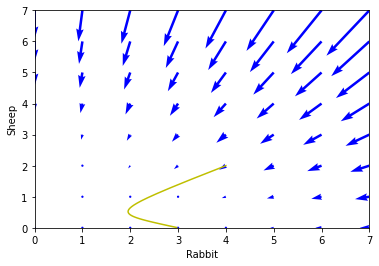

In [ ]:
# a: The standard rate of growth for rabbit population
# b: The multiplicative variable for death rate of rabbits
# c: The multiplicative varirable for death rate of rabbits based on sheep population
# d: The standard rate of growth for sheep population
# e: The multiplicative variable for death rate of sheep
# f: The multiplicative varirable for death rate of sheep based on rabbit population

a=3.0; b=1.0; c=2.0; d=2.0; e=1.0; f=2.0 #change f from 1 to 2
params = (a, b, c, d, e, f)

# specify the time points at which we want to evaluate the system
time = linspace(0.0, 5.0, 101)
# specify the initial values of the two variables
yinit = array([4, 2]) #y0 = 4, y1 =2
yinit2 = array([6,6]) #y0 = 6, y1 =6
# do the integration
y = odeint (myModel, yinit, time, params)
y2 = odeint (myModel, yinit2, time, params)

# plot the results
plt.plot(time, y[:,0], label='Rabbit(4)') # y[:,0] is the first column of y
plt.plot(time, y[:,1], label='Sheep(2)')
plt.plot(time, y2[:,0], label='Rabbit(6)') # y[:,0] is the first column of y
plt.plot(time, y2[:,1], label='Sheep(6)')
plt.xlabel('Time')
plt.ylabel('Number of Rabbits or Sheep')
plt.legend()
# Annotate starting values
# 4,2
s0 = 'Rabbit = ' + str(yinit[0])
s1 = 'Sheep = ' + str(yinit[1])
plt.annotate(s0, xy=[0,yinit[0]])
plt.annotate(s1, xy=[0,yinit[1]])

s2 = 'Rabbit = ' + str(yinit2[0]) +','
s3 = 'Sheep = ' + str(yinit2[1])
plt.annotate(s2, xy=[0,yinit2[0]])
plt.annotate(s3, xy=[1,yinit2[1]]) #label to avoid overlap


#plt.savefig('lec23fig1.png', bbox_inches='tight') #save the plot to a file
plt.show(block=False) #allows the program to continue after showing figure

# make a new figure
plt.figure()
# create a phase plane plot: Sheep vs. Rabbit
plt.plot(y[:,0], y[:,1], 'y-') #(first column y, second colum y, color)
plt.xlabel('Rabbit')
plt.ylabel('Sheep')
# specify the points at which to show the derivative vector
y0lim = array([0, 7, 8]) # 8 since we want every integer from 0 to 7 to display
y1lim = array([0, 7, 8])
phaseportrait(myModel, y0lim, y1lim, a, b, c, d, e, f) # needs indidual values
#plt.savefig('lec23fig2.png', bbox_inches='tight') #save the plot to a file
plt.show()

########### Question 4 ###########
# We can see that the sheep population drastically decreased in both instances
# as opposed to before where the sheep starting at 6 ended with a positive rate.
# This is due to the fact that we have increased the rate of sheep dieing based on
# the rabbit population, and in the 6,6 model, we have a greater number of rabbits that
# would cause a greater decrease in sheep. Due to the decrease in sheep, we see that
# the rabbit population also increases as it has less competition over time.